In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

In [161]:
if os.getcwd().split("/")[-1] != "DataSources":
    if os.getcwd().split("/")[-1] == "FeaturesExtracted":
        os.chdir("../../SpotGenTrack/DataSources")
    else:
        os.chdir("SpotGenTrack/DataSources")

artistsDF = pd.read_csv("spotify_artists.csv", index_col=0)
albumsDF = pd.read_csv("spotify_albums.csv", index_col=0)
tracksDF = pd.read_csv("spotify_tracks.csv", index_col=0)

if os.getcwd().split("/")[-1] != "FeaturesExtracted":
    if os.getcwd().split("/")[-1] == "DataSources":
        os.chdir("../../SpotGenTrack/FeaturesExtracted")
    else:
        os.chdir("SpotGenTrack/FeaturesExtracted")

lyricsDF = pd.read_csv("lyrics_features.csv", index_col=0)
lowlevelDF = pd.read_csv("low_level_audio_features.csv", index_col=0)

In [162]:
artistsDF.columns

Index(['artist_popularity', 'followers', 'genres', 'id', 'name', 'track_id',
       'track_name_prev', 'type'],
      dtype='object')

In [163]:
albumsDF.columns

Index(['album_type', 'artist_id', 'available_markets', 'external_urls', 'href',
       'id', 'images', 'name', 'release_date', 'release_date_precision',
       'total_tracks', 'track_id', 'track_name_prev', 'uri', 'type'],
      dtype='object')

In [164]:
tracksDF.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

In [165]:
lyricsDF.columns

Index(['mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'track_id', 'vocabulary_wealth'],
      dtype='object')

In [166]:
lowlevelDF.columns

Index(['Chroma_1', 'Chroma_10', 'Chroma_11', 'Chroma_12', 'Chroma_2',
       'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6', 'Chroma_7',
       ...
       'Tonnetz_4', 'Tonnetz_5', 'Tonnetz_6', 'ZCR', 'entropy_energy',
       'spectral_bandwith', 'spectral_centroid', 'spectral_rollOff_max',
       'spectral_rollOff_min', 'track_id'],
      dtype='object', length=208)

In [167]:
tracksDF["popularity"].describe()

count    101939.000000
mean         39.782311
std          16.790769
min           0.000000
25%          29.000000
50%          41.000000
75%          52.000000
max          97.000000
Name: popularity, dtype: float64

In [168]:
finalDF = tracksDF.set_index("id").join(albumsDF.set_index("track_id"), lsuffix='_track', rsuffix='_album')
finalDF = finalDF.set_index("artist_id").join(artistsDF.set_index("id"), lsuffix='_final', rsuffix='_artist')
finalDF = finalDF.set_index("track_id").join(lyricsDF.set_index("track_id"))
finalDF = finalDF.join(lowlevelDF.set_index("track_id"))

In [169]:
finalDF.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets_track', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy',
       ...
       'Tonnetz_3', 'Tonnetz_4', 'Tonnetz_5', 'Tonnetz_6', 'ZCR',
       'entropy_energy', 'spectral_bandwith', 'spectral_centroid',
       'spectral_rollOff_max', 'spectral_rollOff_min'],
      dtype='object', length=262)

In [170]:
unselected_columns = ['country',
       'track_name_prev_track', 'uri_track', 'type_track',
       'external_urls', 'href_album', 'id', 'images', 'name_album',
       'release_date', 'release_date_precision',
       'track_name_prev_album', 'uri_album',
       'track_name_prev', 'type']

finalDF = finalDF[finalDF.columns.difference(unselected_columns)]

In [171]:
finalDF.head()

,Chroma_1,Chroma_10,Chroma_11,Chroma_12,Chroma_2,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,...,spectral_rollOff_min,speechiness,tempo,time_signature,total_tracks,track_href,track_number,type_album,valence,vocabulary_wealth
track_id,,,,,,,,,,,,,,,,,,,,,
000YQJ9lmNX02OxJ7hEh4R,0.529747,0.579532,0.602253,0.601952,0.473524,0.484652,0.581320,0.647932,0.654907,0.699457,...,177.715592,0.1700,169.679,4.0,14.0,https://api.spotify.com/v1/tracks/000YQJ9lmNX0...,3.0,album,0.3300,NaN
002F8HWG4UVMxby4Z2aOFI,0.398480,0.416219,0.524013,0.418340,0.557301,0.436152,0.329821,0.341911,0.547729,0.627818,...,170.632302,0.0383,134.842,5.0,11.0,https://api.spotify.com/v1/tracks/002F8HWG4UVM...,11.0,album,0.0747,0.43
005MgQP8PudV87xzErcvPF,0.434861,0.561093,0.504532,0.447697,0.516344,0.609904,0.485946,0.438677,0.473516,0.503523,...,196.407146,0.0408,85.802,4.0,35.0,https://api.spotify.com/v1/tracks/6Tffg9biSqhh...,8.0,album,0.6840,0.67
005MgQP8PudV87xzErcvPF,0.434861,0.561093,0.504532,0.447697,0.516344,0.609904,0.485946,0.438677,0.473516,0.503523,...,196.407146,0.0298,129.044,4.0,14.0,https://api.spotify.com/v1/tracks/4iArHiBejqLp...,2.0,album,0.7470,0.67
005yTjf6DSZIBq8PVAF1Pc,0.840222,0.140865,0.172598,0.517732,0.519454,0.361560,0.358223,0.267970,0.247466,0.328549,...,237.323565,0.0476,70.397,4.0,31.0,https://api.spotify.com/v1/tracks/005yTjf6DSZI...,10.0,album,0.0554,-1.00


In [172]:
# finalDF["release_date"] = pd.to_datetime(finalDF["release_date"], format="%Y-%m-%d")

finalDF["available_markets_track_count"] = finalDF["available_markets_track"].str.len()
finalDF["available_markets_album_count"] = finalDF["available_markets_album"].str.len()
# finalDF["month"] = pd.DatetimeIndex(finalDF["release_date"]).month
# finalDF["month"] = pd.to_numeric(finalDF["month"])

In [173]:
# just_dummies = pd.get_dummies(finalDF["month"])
# finalDF = pd.concat([finalDF, just_dummies], axis=1)  

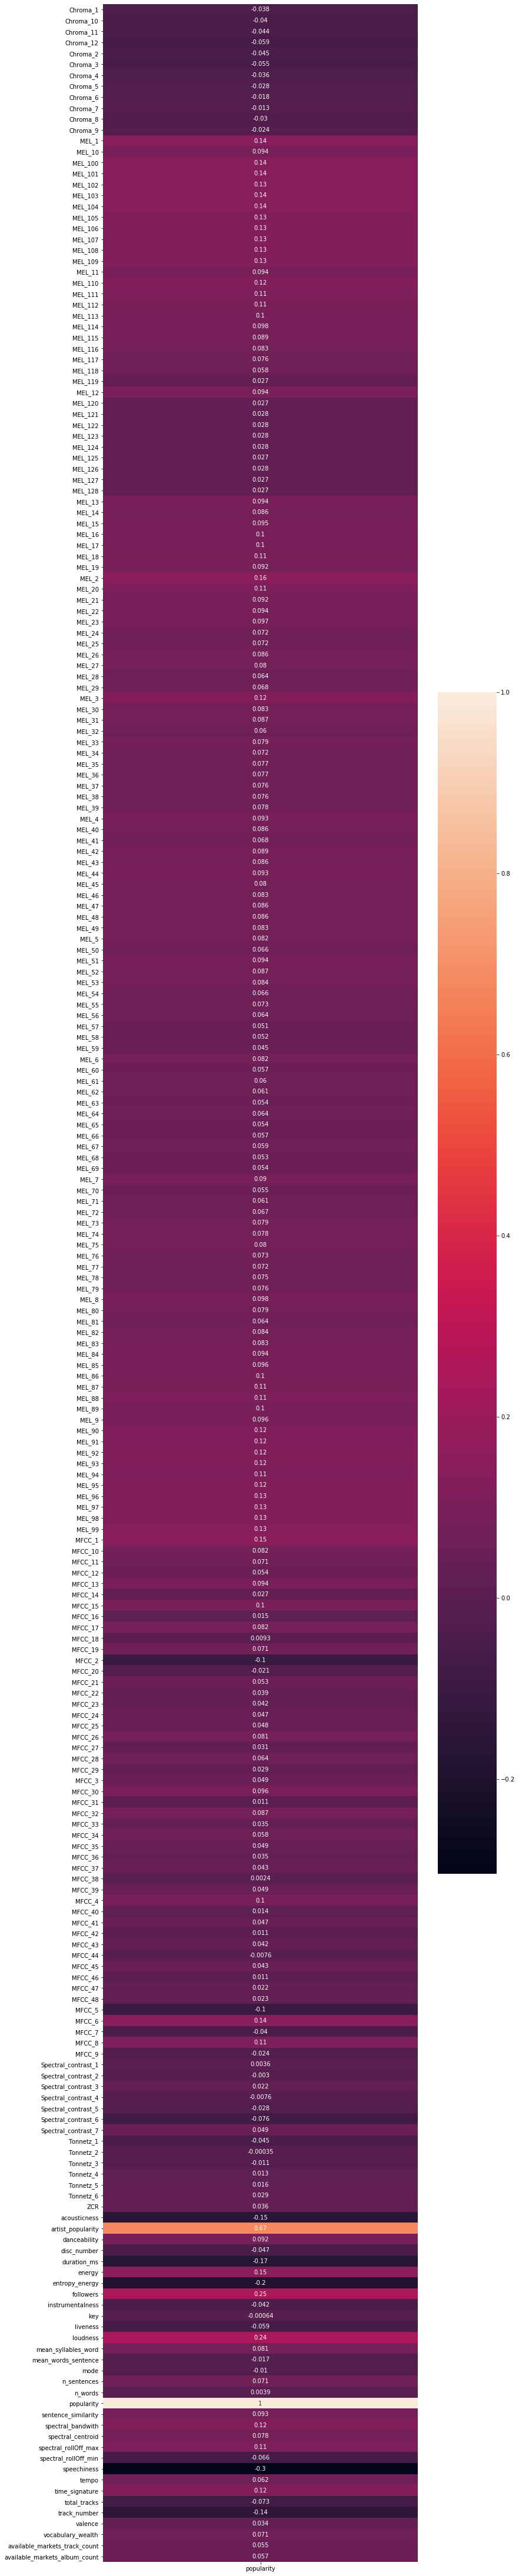

In [174]:
corr = finalDF.corr()
popularity_corr = corr[["popularity"]]

plt.figure(figsize=(12,80))

sns.heatmap(popularity_corr, annot=True)

plt.show()

In [175]:
finalDF.to_csv("final_df.csv")